### Reading Training and Test Datasets


In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve
from joblib import dump,load
import matplotlib.pyplot as plt 
import seaborn as sn
import os

In [2]:
os.getcwd()

'C:\\Users\\Admin\\Documents\\Covid19repo\\covid19\\Forest'

In [3]:
training_set=pd.read_csv("../TrainTestData/TrainingData.csv")
test_set=pd.read_csv("../TrainTestData/TestData.csv")

In [4]:
training_set.head()

,Unnamed: 0,index,Unnamed: 0.1,age,sex,province,country,latitude,longitude,date_confirmation,outcome,Confirmed,Deaths,Recovered,Active,Incidence_Rate,Case-Fatality_Ratio
0,0,0,0,8.0,1,Gujarat,India,23.02776,72.60027,15.04.2020,hospitalized,120336,3286,100974,16076.0,188.400627,2.730687
1,2,2,2,8.0,1,Gujarat,India,23.02776,72.60027,13.05.2020,recovered,120336,3286,100974,16076.0,188.400627,2.730687
2,3,3,3,8.0,1,Gujarat,India,21.18578,72.83679,16.05.2020,recovered,120336,3286,100974,16076.0,188.400627,2.730687
3,4,4,4,8.0,1,Gujarat,India,23.02776,72.60027,18.04.2020,hospitalized,120336,3286,100974,16076.0,188.400627,2.730687
4,5,5,5,8.0,1,Gujarat,India,22.30946,73.17993,12.05.2020,recovered,120336,3286,100974,16076.0,188.400627,2.730687


In [5]:
test_set.head()


,Unnamed: 0,index,Unnamed: 0.1,age,sex,province,country,latitude,longitude,date_confirmation,outcome,Confirmed,Deaths,Recovered,Active,Incidence_Rate,Case-Fatality_Ratio
0,119815,119815,119815,23.0,1,Maharashtra,India,18.94017,72.83483,17.05.2020,recovered,1167496,31791,834432,301273.0,948.072083,2.723007
1,447884,447884,447884,58.0,0,Choco,Colombia,5.70990,-76.62021,21.05.2020,nonhospitalized,3930,154,3636,140.0,734.818427,3.918575
2,313966,313966,313966,40.0,1,Rajasthan,India,26.46553,74.63169,06.05.2020,hospitalized,111290,1308,92265,17717.0,137.339636,1.175308
3,304061,304061,304061,36.0,1,Tamil Nadu,India,11.13927,79.08428,06.05.2020,hospitalized,530908,8685,475717,46506.0,682.039258,1.635877
4,200984,200984,200984,67.0,0,Maharashtra,India,19.20000,72.96667,29.05.2020,recovered,1167496,31791,834432,301273.0,948.072083,2.723007


In [6]:
print("The number of rows and columns in training dataset are:",training_set.shape)

The number of rows and columns in training dataset are: (362230, 17)


In [7]:
print("The number of rows and columns in test dataset are:",test_set.shape)

The number of rows and columns in test dataset are: (90557, 17)


### To remove columns with categorical values and to Extract Features and Labels from Dataframes

In [8]:
def LoadTrainingData():
    training_set=pd.read_csv("../TrainTestData/TrainingData.csv")
    train_labels = training_set["outcome"].values
    training_set = training_set[["age", "sex", "latitude", "longitude",
                                 "Confirmed", "Deaths", "Recovered", "Active", "Incidence_Rate", "Case-Fatality_Ratio"]]
    train_features = training_set.values
    return train_features, train_labels

In [9]:
def LoadTestData():
    test_set=pd.read_csv("../TrainTestData/TestData.csv")
    test_labels = test_set["outcome"].values
    test_set = test_set[["age", "sex", "latitude", "longitude",
                         "Confirmed", "Deaths", "Recovered", "Active", "Incidence_Rate", "Case-Fatality_Ratio"]]
    test_features = test_set.values
    return test_features, test_labels

### Creating the Random Forest Model

In [10]:
def RandomForestModel():
    feature,label=LoadTrainingData()
    forest = RandomForestClassifier(n_estimators = 100, criterion='entropy',random_state = 0)
    forest.fit(feature,label)
    dump(forest,"RandomForest.joblib")

### Evaluating the Model

In [11]:
def Evaluation():
    loaded_forest=load("RandomForest.joblib")
    train_features,train_labels=LoadTrainingData()
    test_features,test_labels=LoadTestData()
    predictions=loaded_forest.predict(test_features)
    
    #Metric 1:Confusion Matrix
    matrix=confusion_matrix(test_labels,predictions)
    print("The confusion matrix for random forest classifier is:\n")
    plt.figure(figsize=(10,7))
    sn.heatmap(matrix, annot=True, fmt='g')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()
    
    #Metric 2:Classification Report
    report=classification_report(test_labels,predictions)
    print("\033[1m\n \n The classification report for random forest classifier is:\n",report)
    
    #Metric 3:Accuracy Score
    score=accuracy_score(test_labels,predictions)
    print("\n The accuracy score for random forest classifier using entropy is:\n",score,"\n\n")
    
    #Metric 4:Validation Score
    print("Training Score : " +
          str(loaded_forest.score(train_features, train_labels)))
    print("Validation Score :" +
          str(loaded_forest.score(test_features,test_labels)))
    
    
   

### Random Forest Model with Varying Hyperparameter(Criterion)

In [12]:
def RandomForest2():
    feature,label=LoadTrainingData()
    forest2 = RandomForestClassifier(n_estimators = 100, criterion='gini',max_features=7,max_depth=8,min_samples_leaf=20,random_state = 1)
    forest2.fit(feature,label)
    test_features,test_labels=LoadTestData()
    predictions=forest2.predict(test_features)
    
    print("\n\nThe validation scores for random forest classifier 2 is:\n")
    print("Training Score :" +
          str(forest2.score(feature,label)))
    print("Validation Score :" +
          str(forest2.score(test_features,test_labels)))
    
    
    


### Random Forest Classifier with an Increase in The Number of Decision Trees

In [13]:
def RandomForest3():
    feature,label=LoadTrainingData()
    forest3 = RandomForestClassifier(n_estimators =200, criterion='entropy',max_features=3,max_depth=30,random_state =1)
    forest3.fit(feature,label)
    test_features,test_labels=LoadTestData()
    predictions=forest3.predict(test_features)
    
    print("\n\nThe validation scores of random forest classifier 3 using more decision trees is:\n")
    print("Training Score :" +
          str(forest3.score(feature, label)))
    print("Validation Score :" +
          str(forest3.score(test_features,test_labels)))
    
    
    
    
    


In [14]:
def Overfitting():
    train_features, train_labels = LoadTrainingData()
    train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(n_estimators=10,criterion='entropy', random_state=1),
                                                            train_features,
                                                            train_labels,
                                                            # Number of folds in cross-validation
                                                            cv=10,
                                                            # Evaluation metric
                                                            scoring='accuracy',
                                                            # Use all computer cores
                                                            n_jobs=-1,
                                                            # 20 different sizes of the training set
                                                            train_sizes=np.linspace(0.01, 1.0, 50))
    
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    
    est_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.plot(train_sizes, train_mean, '--',
             color="#111111",  label="Training score")
    plt.plot(train_sizes, test_mean, color="#111111",
             label="Cross-validation score")
    
    plt.fill_between(train_sizes, train_mean - train_std,
                     train_mean + train_std, color="#DDDDDD")
    plt.fill_between(train_sizes, test_mean - test_std,
                     test_mean + test_std, color="#DDDDDD")
    
    plt.title("Learning Curve")
    plt.xlabel("Training Set Size"), plt.ylabel(
        "Accuracy Score"), plt.legend(loc="best")
    plt.tight_layout()
    plt.savefig('RandomForestLearningCurve.png')

In [15]:
def main():
    RandomForestModel()
    Evaluation()
    RandomForest2()
    RandomForest3()
    Overfitting()
    

### Evaluation Metrics Results

The confusion matrix for random forest classifier is:



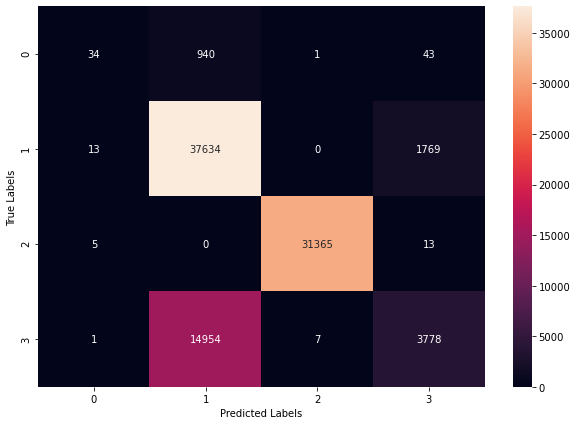


 
 The classification report for random forest classifier is:
                  precision    recall  f1-score   support

       deceased       0.64      0.03      0.06      1018
   hospitalized       0.70      0.95      0.81     39416
nonhospitalized       1.00      1.00      1.00     31383
      recovered       0.67      0.20      0.31     18740

       accuracy                           0.80     90557
      macro avg       0.75      0.55      0.55     90557
   weighted avg       0.80      0.80      0.76     90557


 The accuracy score for random forest classifier using entropy is:
 0.8040350276621354 


Training Score : 0.8106506915495679
Validation Score :0.8040350276621354


The validation scores for random forest classifier 2 is:

Training Score :0.8005686994451039
Validation Score :0.8008436675243217


The validation scores of random forest classifier 3 using more decision trees is:

Training Score :0.8106589735803219
Validation Score :0.8042558830349945


In [ ]:
main()